In [89]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import glob
import zipfile
#pip install seaborn
#pip install openpyxl


In [90]:
df= pd.read_excel('Sales.xlsx',sheet_name="Sales")

In [91]:
df.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


In [92]:
df1=df.drop('CustID',axis=1)

In [93]:
df1.head()

,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


In [94]:
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AgentBonus,4520.0,NaN,NaN,NaN,4077.838274,1403.321711,1605.0,3027.75,3911.5,4867.25,9608.0
Age,4251.0,NaN,NaN,NaN,14.494707,9.037629,2.0,7.0,13.0,20.0,58.0
CustTenure,4294.0,NaN,NaN,NaN,14.469027,8.963671,2.0,7.0,13.0,20.0,57.0
Channel,4520,3,Agent,3194,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,4520,5,Salaried,2192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EducationField,4520,7,Graduate,1870,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,4520,3,Male,2688,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ExistingProdType,4520.0,NaN,NaN,NaN,3.688938,1.015769,1.0,3.0,4.0,4.0,6.0
Designation,4520,6,Manager,1620,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPolicy,4475.0,NaN,NaN,NaN,3.565363,1.455926,1.0,2.0,4.0,5.0,6.0


In [95]:
df1.shape

(4520, 19)

In [96]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AgentBonus            4520 non-null   int64  
 1   Age                   4251 non-null   float64
 2   CustTenure            4294 non-null   float64
 3   Channel               4520 non-null   object 
 4   Occupation            4520 non-null   object 
 5   EducationField        4520 non-null   object 
 6   Gender                4520 non-null   object 
 7   ExistingProdType      4520 non-null   int64  
 8   Designation           4520 non-null   object 
 9   NumberOfPolicy        4475 non-null   float64
 10  MaritalStatus         4520 non-null   object 
 11  MonthlyIncome         4284 non-null   float64
 12  Complaint             4520 non-null   int64  
 13  ExistingPolicyTenure  4336 non-null   float64
 14  SumAssured            4366 non-null   float64
 15  Zone                 

In [97]:
df1.isnull().sum()

AgentBonus                0
Age                     269
CustTenure              226
Channel                   0
Occupation                0
EducationField            0
Gender                    0
ExistingProdType          0
Designation               0
NumberOfPolicy           45
MaritalStatus             0
MonthlyIncome           236
Complaint                 0
ExistingPolicyTenure    184
SumAssured              154
Zone                      0
PaymentMethod             0
LastMonthCalls            0
CustCareScore            52
dtype: int64

In [98]:
df1['Age'] = df1['Age'].fillna(df1['Age'].median())

In [99]:
df1['NumberOfPolicy'] = df1['NumberOfPolicy'].fillna(df1['NumberOfPolicy'].median())

In [100]:
df1['MonthlyIncome'] = df1['MonthlyIncome'].fillna(df1['MonthlyIncome'].median())

In [101]:
df1['CustTenure'] = df1['CustTenure'].fillna(df1['CustTenure'].median())

In [102]:
df1['ExistingPolicyTenure'] = df1['ExistingPolicyTenure'].fillna(df1['ExistingPolicyTenure'].median())

In [103]:
df1['SumAssured'] = df1['SumAssured'].fillna(df1['SumAssured'].median())

In [104]:
df1['CustCareScore'] = df1['CustCareScore'].fillna(df1['CustCareScore'].median())

In [105]:
df1.isnull().sum()

AgentBonus              0
Age                     0
CustTenure              0
Channel                 0
Occupation              0
EducationField          0
Gender                  0
ExistingProdType        0
Designation             0
NumberOfPolicy          0
MaritalStatus           0
MonthlyIncome           0
Complaint               0
ExistingPolicyTenure    0
SumAssured              0
Zone                    0
PaymentMethod           0
LastMonthCalls          0
CustCareScore           0
dtype: int64

In [106]:
df1.isnull().sum()

AgentBonus              0
Age                     0
CustTenure              0
Channel                 0
Occupation              0
EducationField          0
Gender                  0
ExistingProdType        0
Designation             0
NumberOfPolicy          0
MaritalStatus           0
MonthlyIncome           0
Complaint               0
ExistingPolicyTenure    0
SumAssured              0
Zone                    0
PaymentMethod           0
LastMonthCalls          0
CustCareScore           0
dtype: int64

Treated the values with median

## Checking the Unique categorical values

In [107]:
print(df1['Channel'].value_counts())

Channel
Agent                  3194
Third Party Partner     858
Online                  468
Name: count, dtype: int64


In [108]:
print(df1['Occupation'].value_counts())

Occupation
Salaried           2192
Small Business     1918
Large Business      255
Laarge Business     153
Free Lancer           2
Name: count, dtype: int64


In [109]:
print(df1['EducationField'].value_counts())

EducationField
Graduate          1870
Under Graduate    1190
Diploma            496
Engineer           408
Post Graduate      252
UG                 230
MBA                 74
Name: count, dtype: int64


In [110]:
print(df1['Gender'].value_counts())

Gender
Male       2688
Female     1507
Fe male     325
Name: count, dtype: int64


In [111]:
print(df1['Designation'].value_counts())

Designation
Manager           1620
Executive         1535
Senior Manager     676
AVP                336
VP                 226
Exe                127
Name: count, dtype: int64


In [112]:
print(df1['MaritalStatus'].value_counts())

MaritalStatus
Married      2268
Single       1254
Divorced      804
Unmarried     194
Name: count, dtype: int64


In [113]:
print(df1['Zone'].value_counts())

Zone
West     2566
North    1884
East       64
South       6
Name: count, dtype: int64


In [114]:
print(df1['PaymentMethod'].value_counts())

PaymentMethod
Half Yearly    2656
Yearly         1434
Monthly         354
Quarterly        76
Name: count, dtype: int64


UV= ['Channel', 'Occupation', 'EducationField', 'Gender', 'Designation', 'MaritalStatus','Zone','PaymentMethod']

unique_words = set() 


In [115]:
df1=df1.replace(['Laarge Business', 'Fe male', 'Exe', 'UG','Graduate'], ['Large Business', 'Female', 'Executive', 'Under Graduate','Post Graduate'])

In [116]:
df1.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [117]:
df1.isnull().sum()

AgentBonus              0
Age                     0
CustTenure              0
Channel                 0
Occupation              0
EducationField          0
Gender                  0
ExistingProdType        0
Designation             0
NumberOfPolicy          0
MaritalStatus           0
MonthlyIncome           0
Complaint               0
ExistingPolicyTenure    0
SumAssured              0
Zone                    0
PaymentMethod           0
LastMonthCalls          0
CustCareScore           0
dtype: int64

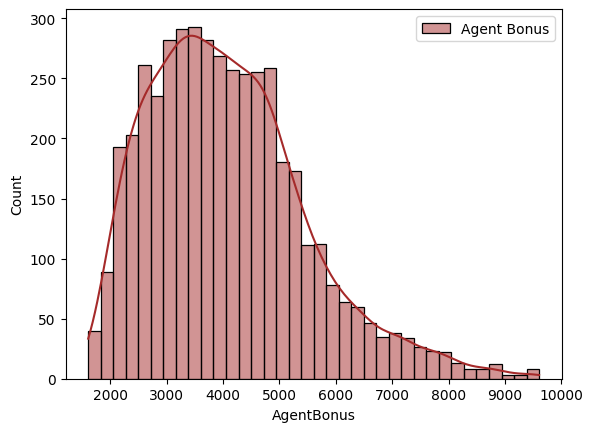

In [118]:
sns.histplot(data=df1, x="AgentBonus", color="brown", label="Agent Bonus", kde=True)


plt.legend() 

plt.show()

<Axes: xlabel='AgentBonus'>

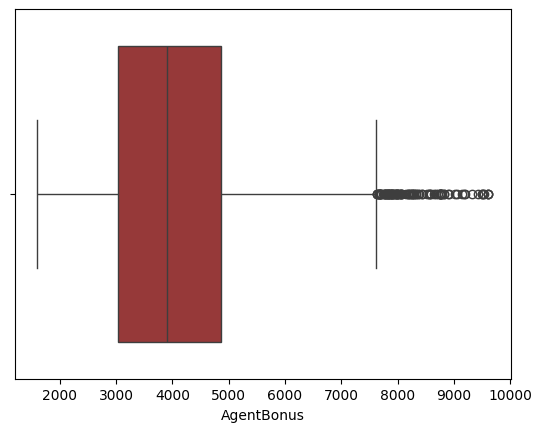

In [119]:
sns.boxplot(data=df1, x="AgentBonus", color="brown")

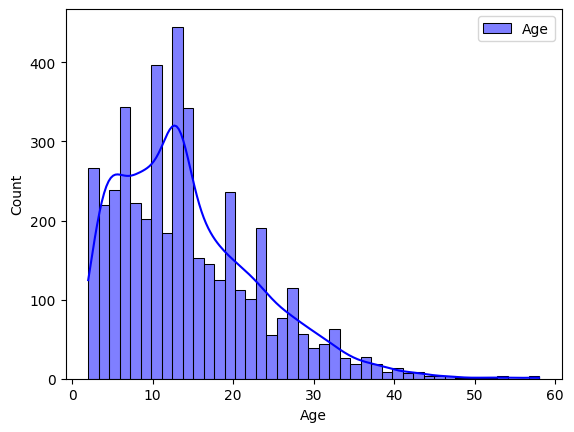

In [120]:
sns.histplot(data=df1, x="Age", color="blue", label="Age", kde=True)


plt.legend() 
plt.show()

<Axes: xlabel='Age'>

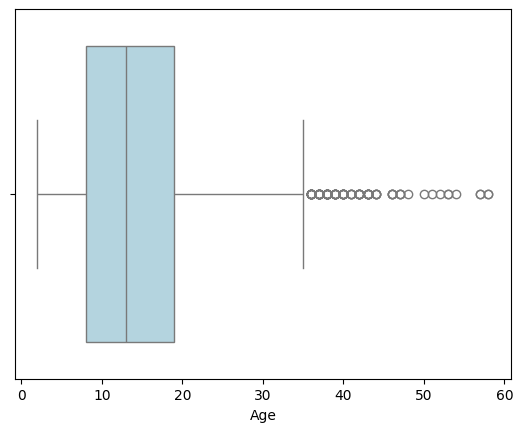

In [121]:
sns.boxplot(data=df1, x="Age", color="lightblue")

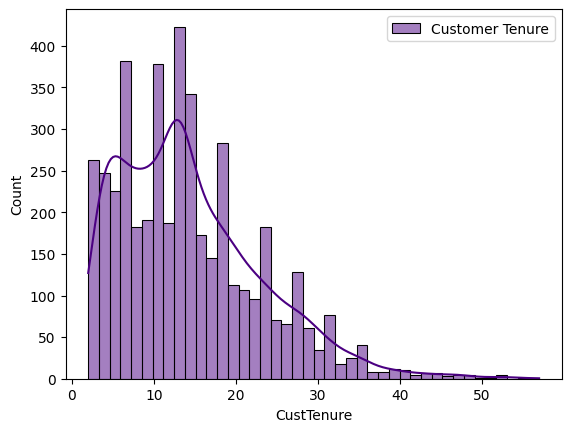

In [122]:
sns.histplot(data=df1, x="CustTenure", color="indigo", label="Customer Tenure", kde=True)


plt.legend() 
plt.show()

<Axes: xlabel='CustTenure'>

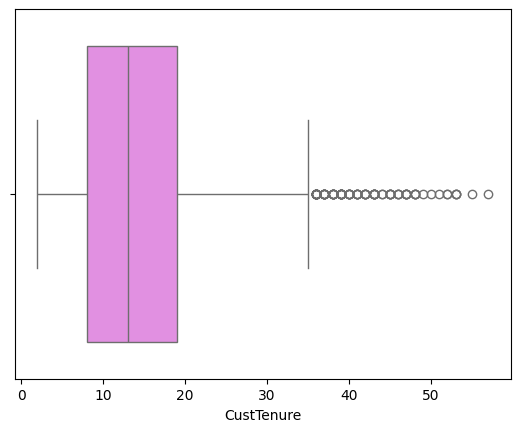

In [123]:
sns.boxplot(data=df1, x="CustTenure", color="violet")

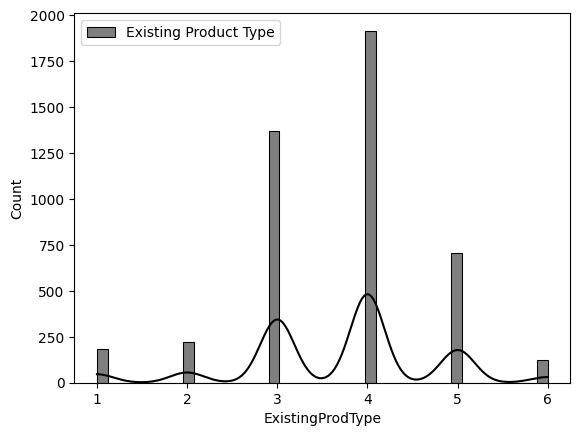

In [124]:
sns.histplot(data=df1, x="ExistingProdType", color="black", label="Existing Product Type", kde=True)


plt.legend() 
plt.show()

<Axes: xlabel='ExistingProdType'>

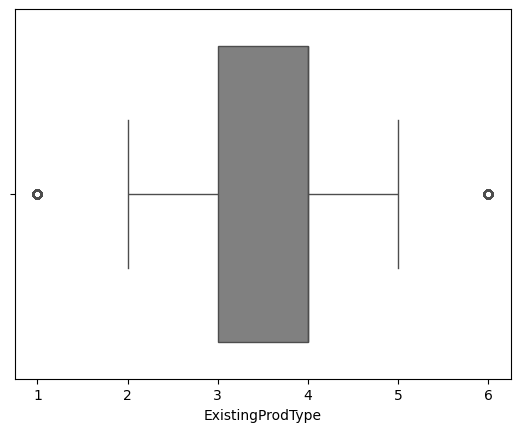

In [125]:
sns.boxplot(data=df1, x="ExistingProdType", color="grey")

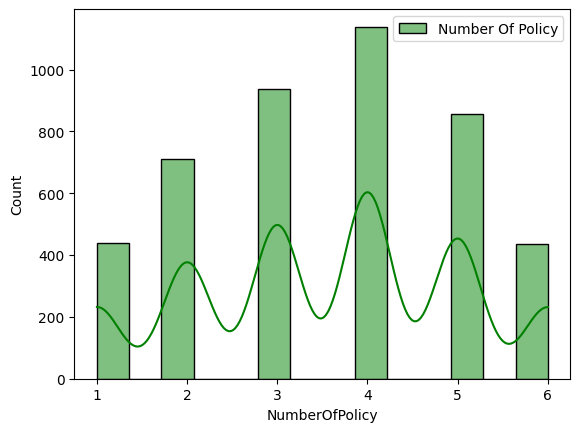

In [126]:
sns.histplot(data=df1, x="NumberOfPolicy", color="green", label="Number Of Policy", kde=True)


plt.legend() 
plt.show()

<Axes: xlabel='NumberOfPolicy'>

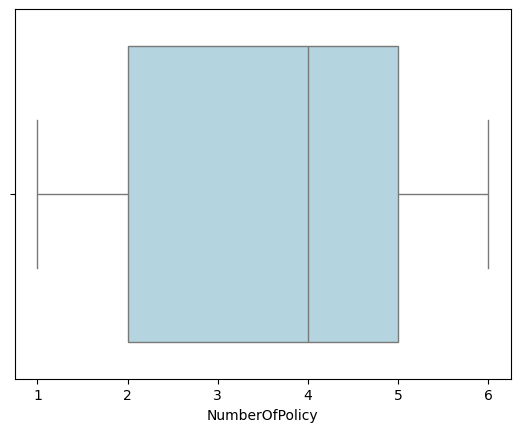

In [127]:
sns.boxplot(data=df1, x="NumberOfPolicy", color="lightblue")

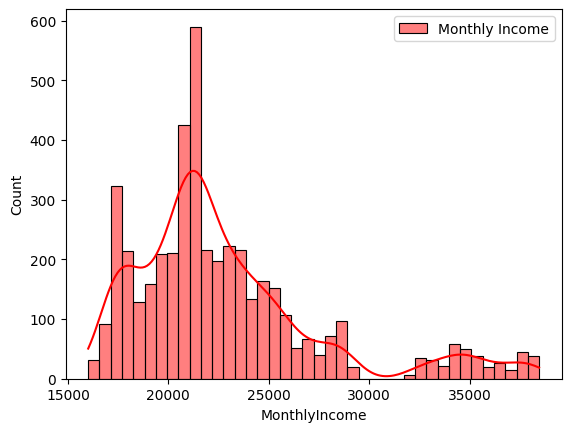

In [128]:
sns.histplot(data=df1, x="MonthlyIncome", color="red", label="Monthly Income", kde=True)


plt.legend() 
plt.show()

<Axes: xlabel='MonthlyIncome'>

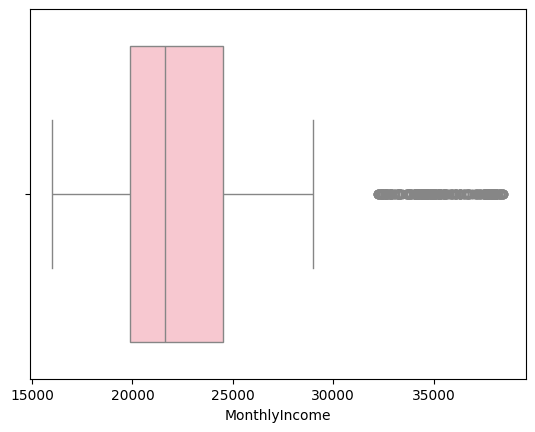

In [129]:
sns.boxplot(data=df1, x="MonthlyIncome", color="pink")

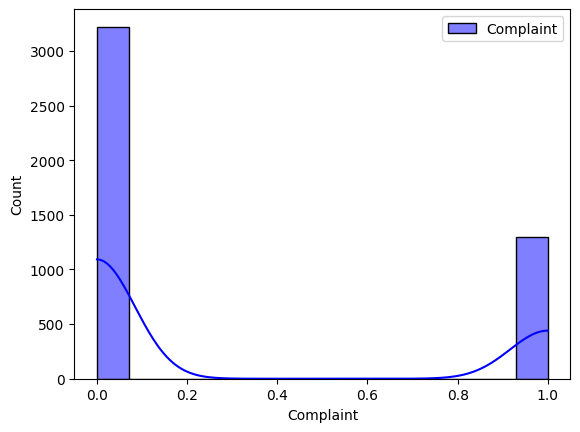

In [130]:
sns.histplot(data=df1, x="Complaint", color="blue", label="Complaint", kde=True)


plt.legend() 
plt.show()

<Axes: xlabel='Complaint'>

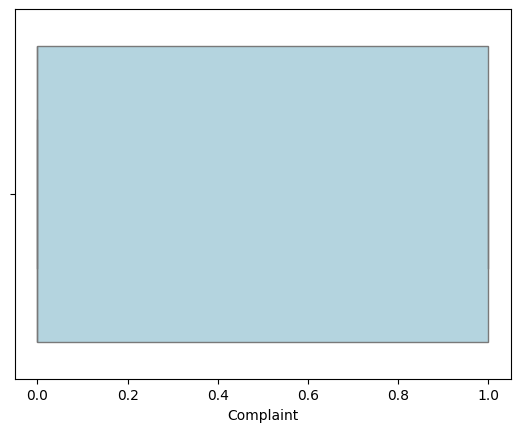

In [131]:
sns.boxplot(data=df1, x="Complaint", color="lightblue")

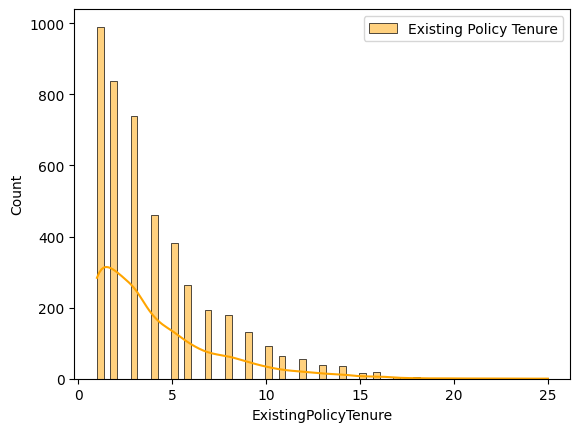

In [132]:
sns.histplot(data=df1, x="ExistingPolicyTenure", color="orange", label="Existing Policy Tenure", kde=True)


plt.legend() 
plt.show()

<Axes: xlabel='ExistingPolicyTenure'>

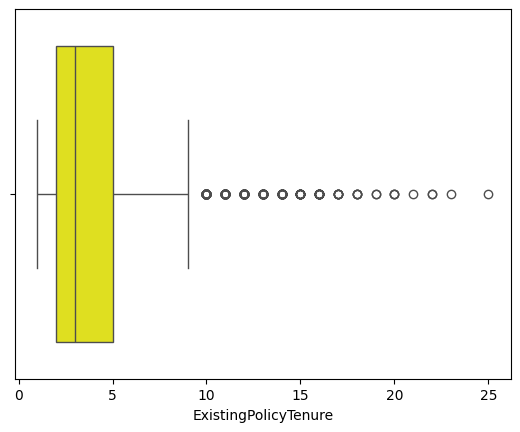

In [133]:
sns.boxplot(data=df1, x="ExistingPolicyTenure", color="yellow")

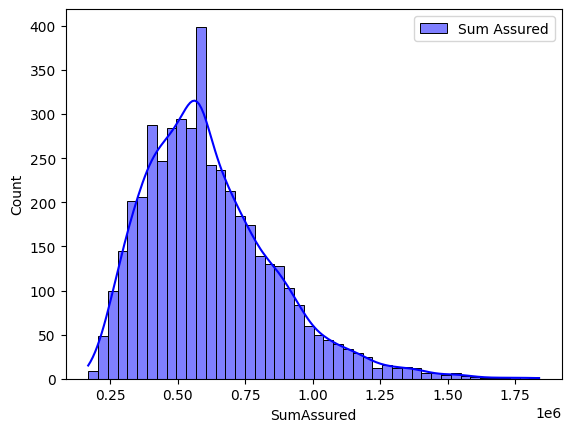

In [134]:
sns.histplot(data=df1, x="SumAssured", color="blue", label="Sum Assured", kde=True)


plt.legend() 
plt.show()

<Axes: xlabel='SumAssured'>

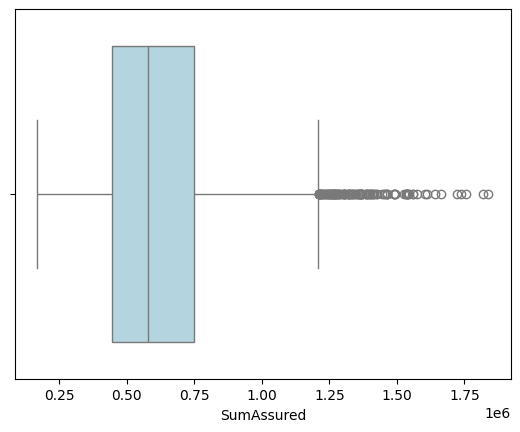

In [135]:
sns.boxplot(data=df1, x="SumAssured", color="lightblue")

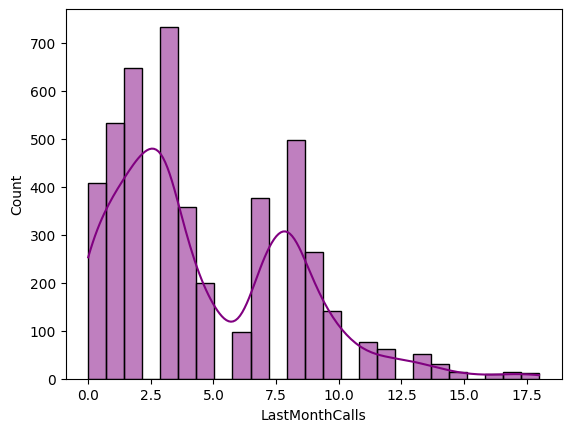

In [136]:
sns.histplot(data=df1, x="LastMonthCalls", color="purple", label="Last Month Calls", kde=True)


 
plt.show()

<Axes: xlabel='LastMonthCalls'>

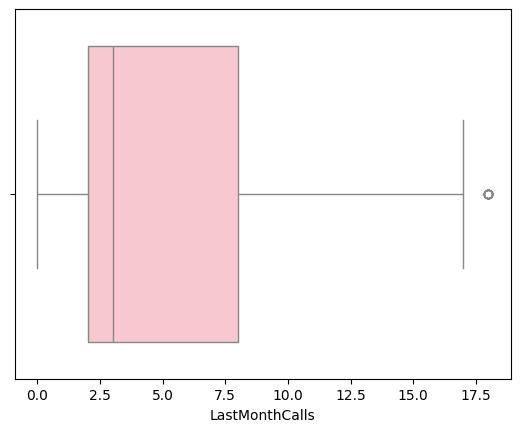

In [137]:
sns.boxplot(data=df1, x="LastMonthCalls", color="pink")

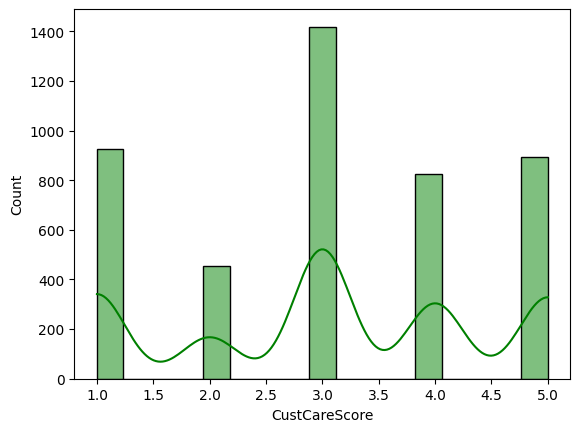

In [138]:
sns.histplot(data=df1, x="CustCareScore", color="green", label="Customer Care Score", kde=True)
 
plt.show()

<Axes: xlabel='CustCareScore'>

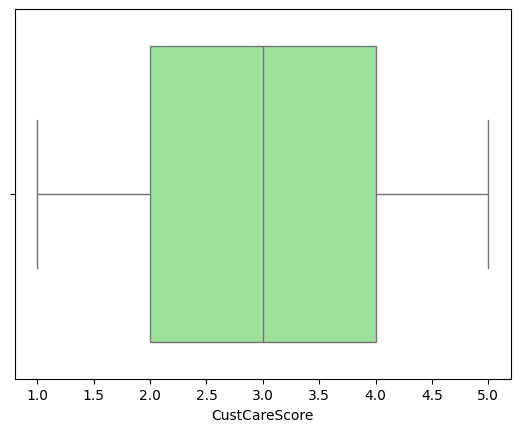

In [139]:
sns.boxplot(data=df1, x="CustCareScore", color="lightgreen")

In [204]:
# skewness along the index axis
df1.skew(axis = 0, skipna = True)

AgentBonus              0.630068
Age                     0.717679
CustTenure              0.692550
ExistingProdType       -0.303794
NumberOfPolicy         -0.108161
MonthlyIncome           0.841896
Complaint               0.941129
ExistingPolicyTenure    0.822603
SumAssured              0.670206
LastMonthCalls          0.790936
CustCareScore          -0.138120
dtype: float64

## Categorical Variable's Univariate Analysis.

In [141]:
df1.head()

,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,4409,22.0,4.0,Agent,Salaried,Post Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,2214,11.0,2.0,Third Party Partner,Salaried,Post Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Executive,3.0,Unmarried,17090.0,1,2.0,578976.5,North,Yearly,0,3.0
3,1791,11.0,13.0,Third Party Partner,Salaried,Post Graduate,Female,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,2955,6.0,13.0,Agent,Small Business,Under Graduate,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


<Axes: xlabel='EducationField', ylabel='count'>

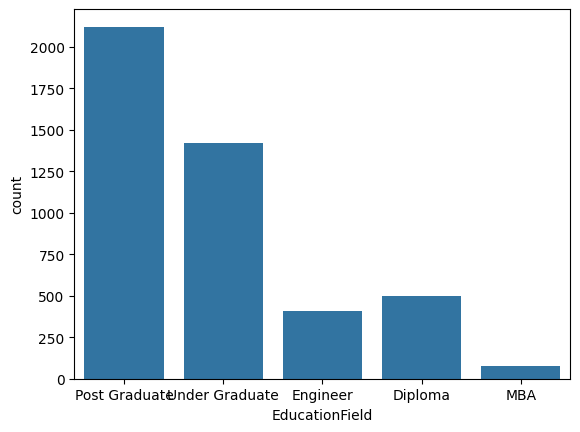

In [142]:
sns.countplot(data=df1,x="EducationField")

<Axes: xlabel='Channel', ylabel='count'>

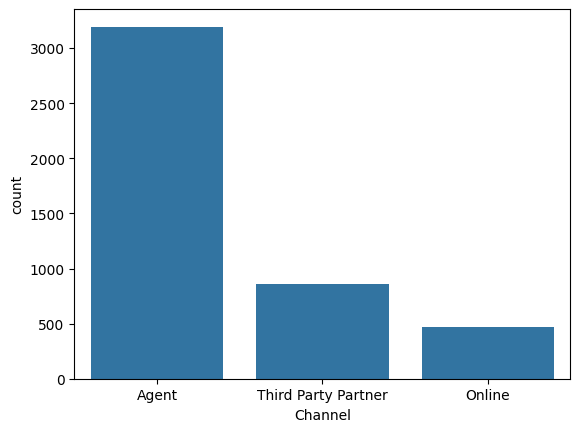

In [143]:
sns.countplot(data=df1,x="Channel")

<Axes: xlabel='Occupation', ylabel='count'>

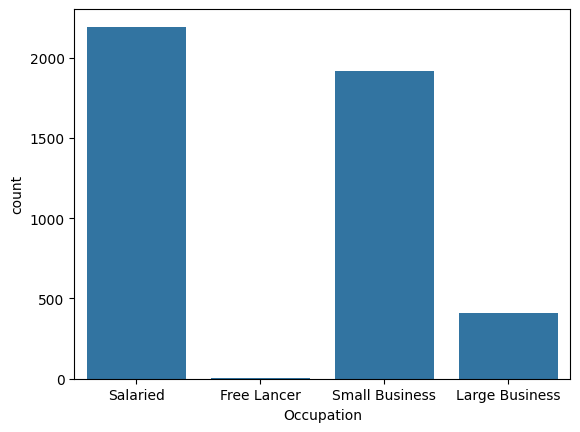

In [144]:
sns.countplot(data=df1,x="Occupation")

<Axes: xlabel='Gender', ylabel='count'>

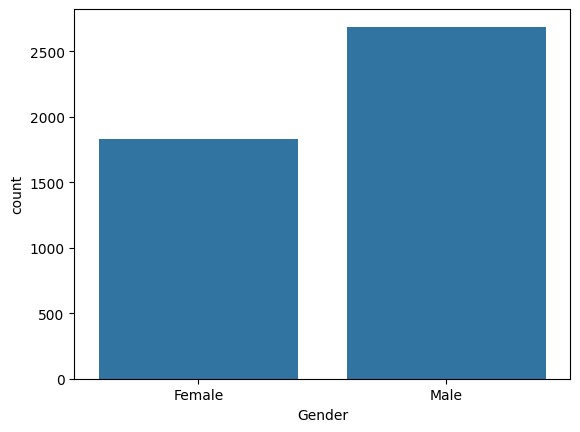

In [145]:
sns.countplot(data=df1,x="Gender")

<Axes: xlabel='Designation', ylabel='count'>

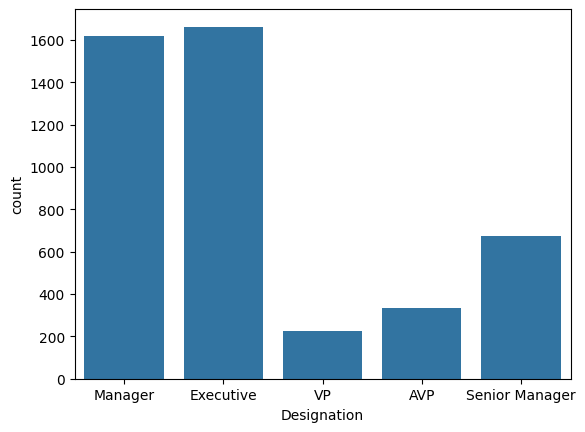

In [146]:
sns.countplot(data=df1,x="Designation")

<Axes: xlabel='MaritalStatus', ylabel='count'>

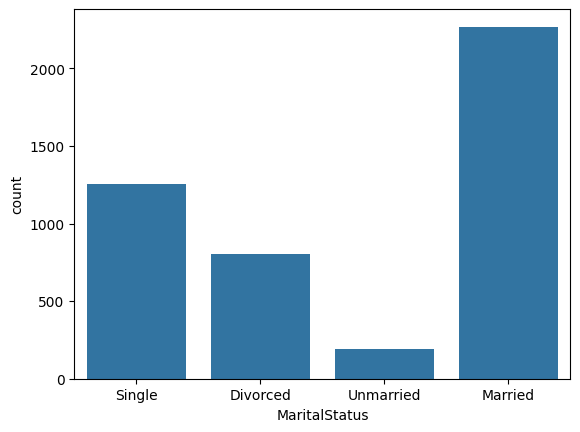

In [147]:
sns.countplot(data=df1,x="MaritalStatus")

<Axes: xlabel='Zone', ylabel='count'>

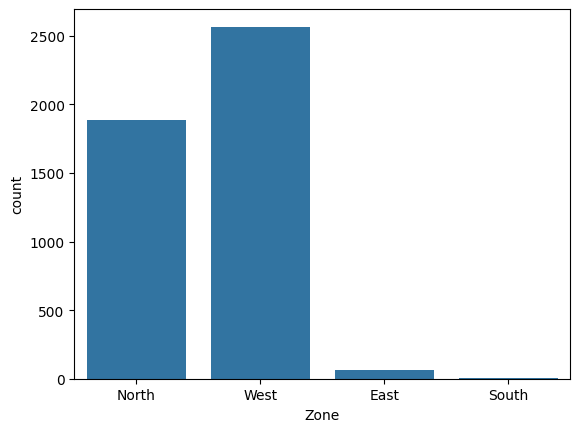

In [148]:
sns.countplot(data=df1,x="Zone")

<Axes: xlabel='PaymentMethod', ylabel='count'>

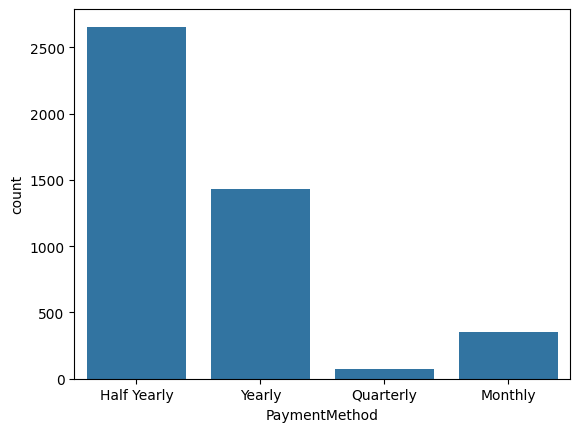

In [149]:
sns.countplot(data=df1,x="PaymentMethod")

## Categorical variables Bivariate Analysis with respect to Agent Bonus

<Axes: xlabel='Channel', ylabel='AgentBonus'>

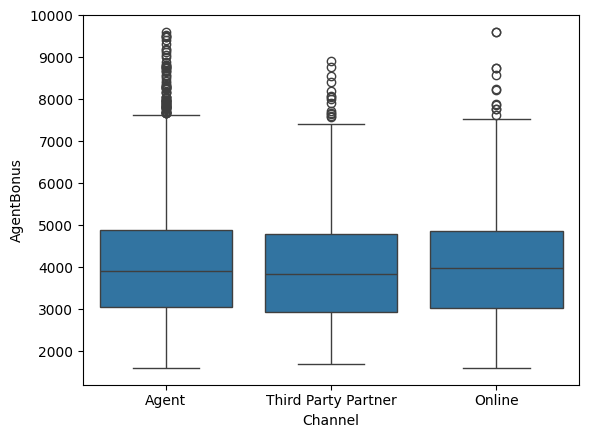

In [150]:
sns.boxplot(x = df1['Channel'],
            y = df1['AgentBonus']
           )

As we can see Agent Bonus has a lot of outliers values present for every channel with almost similar mean values for all 3 channels.

<Axes: xlabel='Occupation', ylabel='AgentBonus'>

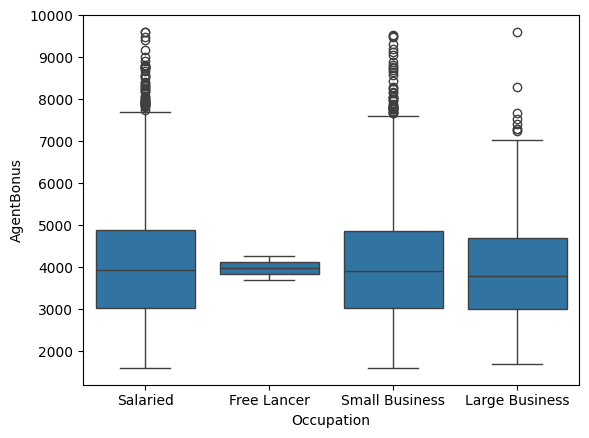

In [151]:
sns.boxplot(x = df1['Occupation'],
            y = df1['AgentBonus']
           )

It is visible that almost similar mean values are there for all occupations.
No outlier present for Free Lancer could be because we have only 2 data points for Free Lancer.

<Axes: xlabel='Gender', ylabel='AgentBonus'>

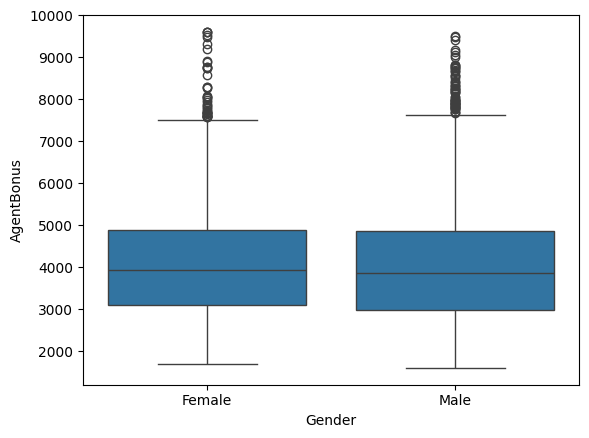

In [152]:
sns.boxplot(x = df1['Gender'],
            y = df1['AgentBonus']
           )

Agent Bonus contains lots of outlier values for both the genders with almost similar mean values for both male and Female.

<Axes: xlabel='Designation', ylabel='AgentBonus'>

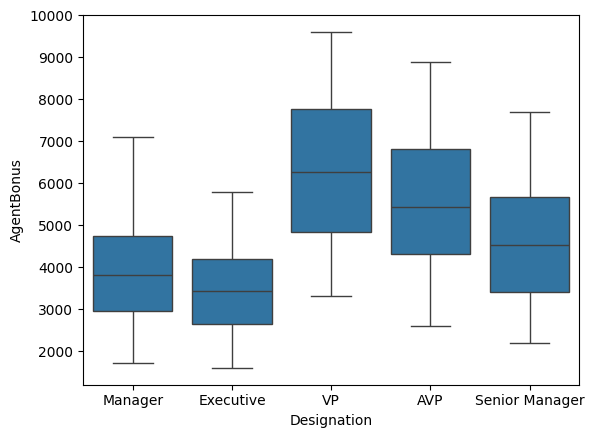

In [153]:
sns.boxplot(x = df1['Designation'],
            y = df1['AgentBonus']
           )

There are no outliers present. VP Designation has the highest mean as compared to other designations.

<Axes: xlabel='MaritalStatus', ylabel='AgentBonus'>

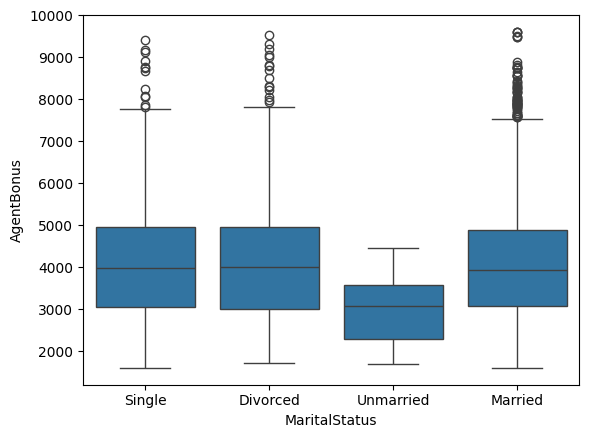

In [154]:
sns.boxplot(x = df1['MaritalStatus'],
            y = df1['AgentBonus']
           )

Agent Bonus variable has lot of outlier values for all the marital status except for the unmarried customers. With almost similar mean values for all the three customers except unmarried.

<Axes: xlabel='Zone', ylabel='AgentBonus'>

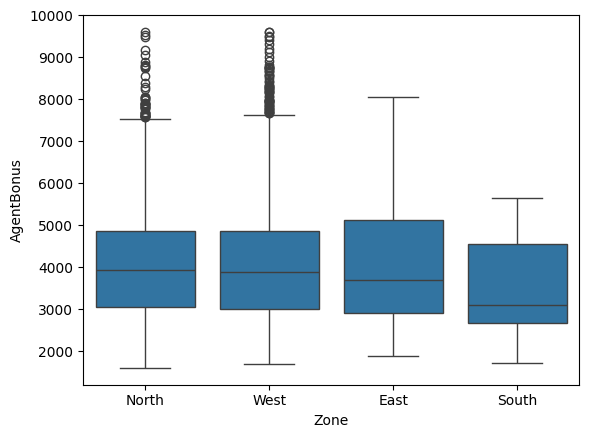

In [155]:
sns.boxplot(x = df1['Zone'],
            y = df1['AgentBonus']
           )

The outliers are present only in North and West Zones. Both having almost simliar means.
There are no outliers present in the East and South Zones may be because of less customer traffic from those Zones

<Axes: xlabel='PaymentMethod', ylabel='AgentBonus'>

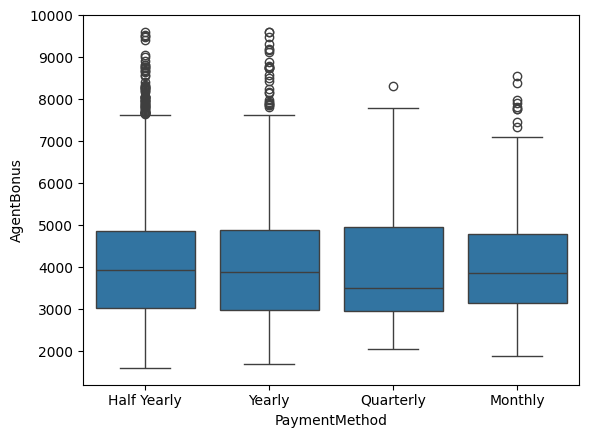

In [156]:
sns.boxplot(x = df1['PaymentMethod'],
            y = df1['AgentBonus']
           )

There are outliers present for all the Payment methods where Quaterly paying customers has the lowest mean.

## Pairplot

sns.pairplot(df1, hue='AgentBonus',corner=True)
plt.show()

plt.figure(figsize=(25,10))
sns.heatmap(df1.corr(), annot=True);

# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df1.boxplot(vert=0)
plt.show()

### Treating the outliers

In [157]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [158]:
lr,ur=remove_outlier(df1["LastMonthCalls"])
df1["LastMonthCalls"]=np.where(df1["LastMonthCalls"]>ur,ur,df1["LastMonthCalls"])
df1["LastMonthCalls"]=np.where(df1["LastMonthCalls"]<lr,lr,df1["LastMonthCalls"])

lr,ur=remove_outlier(df1["SumAssured"])
df1["SumAssured"]=np.where(df1["SumAssured"]>ur,ur,df1["SumAssured"])
df1["SumAssured"]=np.where(df1["SumAssured"]<lr,lr,df1["SumAssured"])

lr,ur=remove_outlier(df1["ExistingPolicyTenure"])
df1["ExistingPolicyTenure"]=np.where(df1["ExistingPolicyTenure"]>ur,ur,df1["ExistingPolicyTenure"])
df1["ExistingPolicyTenure"]=np.where(df1["ExistingPolicyTenure"]<lr,lr,df1["ExistingPolicyTenure"])

lr,ur=remove_outlier(df1["MonthlyIncome"])
df1["MonthlyIncome"]=np.where(df1["MonthlyIncome"]>ur,ur,df1["MonthlyIncome"])
df1["MonthlyIncome"]=np.where(df1["MonthlyIncome"]<lr,lr,df1["MonthlyIncome"])

lr,ur=remove_outlier(df1["ExistingProdType"])
df1["ExistingProdType"]=np.where(df1["ExistingProdType"]>ur,ur,df1["ExistingProdType"])
df1["ExistingProdType"]=np.where(df1["ExistingProdType"]<lr,lr,df1["ExistingProdType"])

lr,ur=remove_outlier(df1["CustTenure"])
df1["CustTenure"]=np.where(df1["CustTenure"]>ur,ur,df1["CustTenure"])
df1["CustTenure"]=np.where(df1["CustTenure"]<lr,lr,df1["CustTenure"])

lr,ur=remove_outlier(df1["Age"])
df1["Age"]=np.where(df1["Age"]>ur,ur,df1["Age"])
df1["Age"]=np.where(df1["Age"]<lr,lr,df1["Age"])

lr,ur=remove_outlier(df1["AgentBonus"])
df1["AgentBonus"]=np.where(df1["AgentBonus"]>ur,ur,df1["AgentBonus"])
df1["AgentBonus"]=np.where(df1["AgentBonus"]<lr,lr,df1["AgentBonus"])

<Axes: >

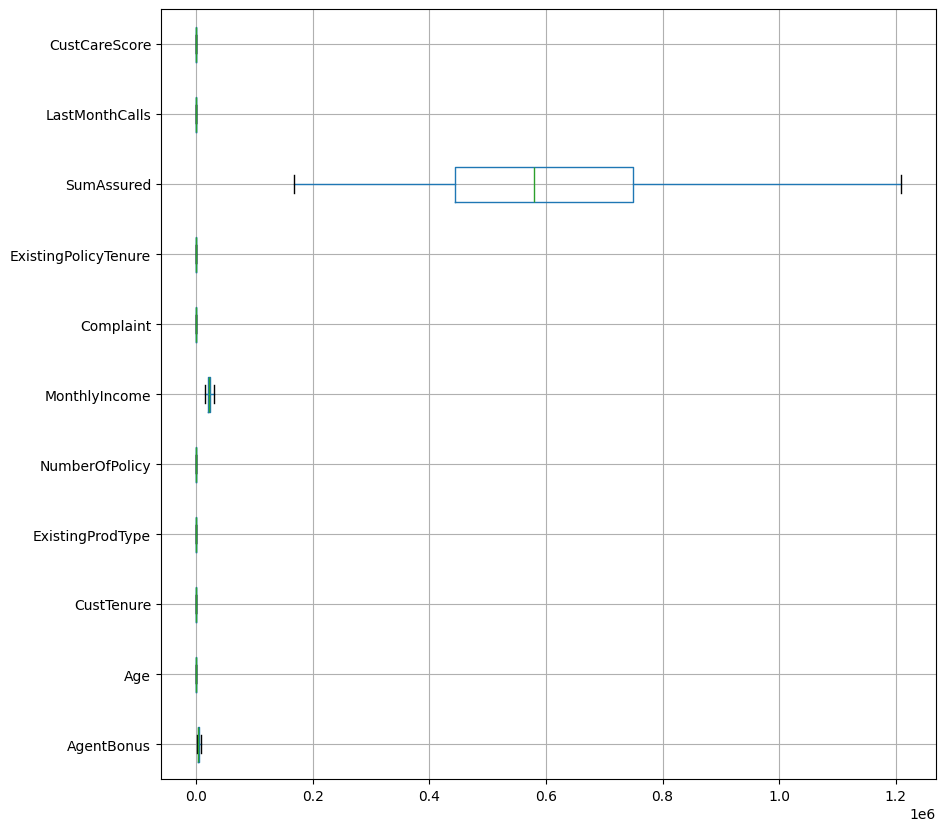

In [159]:
plt.figure(figsize=(10,10))
df1.boxplot(vert=0)

In [160]:
df1.isnull().sum()

AgentBonus              0
Age                     0
CustTenure              0
Channel                 0
Occupation              0
EducationField          0
Gender                  0
ExistingProdType        0
Designation             0
NumberOfPolicy          0
MaritalStatus           0
MonthlyIncome           0
Complaint               0
ExistingPolicyTenure    0
SumAssured              0
Zone                    0
PaymentMethod           0
LastMonthCalls          0
CustCareScore           0
dtype: int64

In [161]:
df1['Age'] = df1['Age'].fillna(df1['Age'].median())

In [162]:
df1['NumberOfPolicy'] = df1['NumberOfPolicy'].fillna(df1['NumberOfPolicy'].median())

In [163]:
df1['MonthlyIncome'] = df1['MonthlyIncome'].fillna(df1['MonthlyIncome'].median())

In [164]:
df1['CustTenure'] = df1['CustTenure'].fillna(df1['CustTenure'].median())

In [165]:
df1['ExistingPolicyTenure'] = df1['ExistingPolicyTenure'].fillna(df1['ExistingPolicyTenure'].median())

In [166]:
df1['SumAssured'] = df1['SumAssured'].fillna(df1['SumAssured'].median())

In [167]:
df1['CustCareScore'] = df1['CustCareScore'].fillna(df1['CustCareScore'].median())

In [168]:
df1.isnull().sum()

AgentBonus              0
Age                     0
CustTenure              0
Channel                 0
Occupation              0
EducationField          0
Gender                  0
ExistingProdType        0
Designation             0
NumberOfPolicy          0
MaritalStatus           0
MonthlyIncome           0
Complaint               0
ExistingPolicyTenure    0
SumAssured              0
Zone                    0
PaymentMethod           0
LastMonthCalls          0
CustCareScore           0
dtype: int64

Treated the values with median

df_cat = df1.drop(['Gender', 'Channel', 'EducationField','Occupation','Designation','MaritalStatus','Zone','PaymentMethod'],axis=1)

In [169]:
df_cat = df1[['Gender', 'Channel', 'EducationField','Occupation', 'Designation','MaritalStatus','Zone','PaymentMethod']]

In [170]:
df1= df1.drop(['Gender', 'Channel', 'EducationField','Occupation', 'Designation','MaritalStatus','Zone','PaymentMethod'],axis =1)

In [171]:
df_cat_coded= pd.get_dummies(df_cat,drop_first=True)
df_cat_coded

,Gender_Male,Channel_Online,Channel_Third Party Partner,EducationField_Engineer,EducationField_MBA,EducationField_Post Graduate,EducationField_Under Graduate,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,...,Designation_VP,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly
0,False,False,False,False,False,True,False,False,True,False,...,False,False,True,False,True,False,False,False,False,False
1,True,False,True,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,True,False,False,False,False,True,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True
3,False,False,True,False,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,True,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,True,False,False,False,False,True,False,False,False,True,...,False,False,True,False,False,False,True,False,False,True
4516,False,False,False,False,False,False,True,False,True,False,...,False,True,False,False,True,False,False,False,False,True
4517,False,False,False,True,False,False,False,False,True,False,...,False,False,True,False,True,False,False,False,False,False
4518,False,True,False,False,False,True,False,False,False,True,...,False,False,True,False,False,False,True,False,False,False


In [282]:
df_final=pd.concat([df_cat_coded,df1],axis=1)
df_final

,Gender_Male,Channel_Online,Channel_Third Party Partner,EducationField_Engineer,EducationField_MBA,EducationField_Post Graduate,EducationField_Under Graduate,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,...,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore
0,False,False,False,False,False,True,False,False,True,False,...,22.0,4.0,3.0,2.0,20993.0,1,2.0,806761.0,5.0,2.0
1,True,False,True,False,False,True,False,False,True,False,...,11.0,2.0,4.0,4.0,20130.0,0,3.0,294502.0,7.0,3.0
2,True,False,False,False,False,True,False,False,False,False,...,26.0,4.0,4.0,3.0,17090.0,1,2.0,578976.5,0.0,3.0
3,False,False,True,False,False,True,False,False,True,False,...,11.0,13.0,3.0,3.0,17909.0,1,2.0,268635.0,0.0,5.0
4,True,False,False,False,False,False,True,False,False,True,...,6.0,13.0,3.0,4.0,18468.0,0,4.0,366405.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,True,False,False,False,False,True,False,False,False,True,...,4.0,8.0,4.0,2.0,26355.0,0,2.0,636473.0,9.0,1.0
4516,False,False,False,False,False,False,True,False,True,False,...,9.0,9.0,2.0,2.0,20991.0,0,3.0,296813.0,1.0,3.0
4517,False,False,False,True,False,False,False,False,True,False,...,23.0,23.0,5.0,5.0,21606.0,0,2.0,667371.0,4.0,1.0
4518,False,True,False,False,False,True,False,False,False,True,...,10.0,10.0,4.0,2.0,20068.0,0,6.0,943999.0,1.0,5.0


In [283]:
df1.isnull().sum()

AgentBonus              0
Age                     0
CustTenure              0
ExistingProdType        0
NumberOfPolicy          0
MonthlyIncome           0
Complaint               0
ExistingPolicyTenure    0
SumAssured              0
LastMonthCalls          0
CustCareScore           0
dtype: int64

In [284]:
df1

,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore
0,4409.0,22.0,4.0,3.0,2.0,20993.0,1,2.0,806761.0,5.0,2.0
1,2214.0,11.0,2.0,4.0,4.0,20130.0,0,3.0,294502.0,7.0,3.0
2,4273.0,26.0,4.0,4.0,3.0,17090.0,1,2.0,578976.5,0.0,3.0
3,1791.0,11.0,13.0,3.0,3.0,17909.0,1,2.0,268635.0,0.0,5.0
4,2955.0,6.0,13.0,3.0,4.0,18468.0,0,4.0,366405.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
4515,3953.0,4.0,8.0,4.0,2.0,26355.0,0,2.0,636473.0,9.0,1.0
4516,2939.0,9.0,9.0,2.0,2.0,20991.0,0,3.0,296813.0,1.0,3.0
4517,3792.0,23.0,23.0,5.0,5.0,21606.0,0,2.0,667371.0,4.0,1.0
4518,4816.0,10.0,10.0,4.0,2.0,20068.0,0,6.0,943999.0,1.0,5.0


In [285]:
df_final= pd.concat([df1,df_cat_coded], axis=1, verify_integrity=True ) 
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   AgentBonus                     4520 non-null   float64
 1   Age                            4520 non-null   float64
 2   CustTenure                     4520 non-null   float64
 3   ExistingProdType               4520 non-null   float64
 4   NumberOfPolicy                 4520 non-null   float64
 5   MonthlyIncome                  4520 non-null   float64
 6   Complaint                      4520 non-null   int64  
 7   ExistingPolicyTenure           4520 non-null   float64
 8   SumAssured                     4520 non-null   float64
 9   LastMonthCalls                 4520 non-null   float64
 10  CustCareScore                  4520 non-null   float64
 11  Gender_Male                    4520 non-null   bool   
 12  Channel_Online                 4520 non-null   b

In [286]:
X = df_final.drop("AgentBonus",axis=1)  ## Features
y = df_final["AgentBonus"]  ## Target

In [287]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

In [288]:
X_test

,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore,...,Designation_VP,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly
610,11.0,23.0,3.0,2.0,22756.000,0,1.0,785082.0,4.0,2.0,...,False,False,True,False,False,False,True,False,False,False
1519,20.0,7.0,3.0,1.0,31542.375,0,3.0,1200156.0,6.0,1.0,...,True,True,False,False,True,False,False,False,False,False
1620,7.0,15.0,3.0,1.0,18697.000,0,4.0,430218.0,8.0,3.0,...,False,True,False,False,True,False,False,False,False,False
2031,13.0,22.0,3.0,4.0,21385.000,1,4.0,884697.0,7.0,5.0,...,False,True,False,False,True,False,False,False,False,False
494,12.0,14.0,3.0,3.0,17259.000,0,1.0,253707.0,0.0,2.0,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,18.0,22.0,3.0,3.0,20296.000,0,1.0,617404.0,7.0,5.0,...,False,False,False,False,False,False,True,False,False,False
1909,4.0,9.0,4.0,1.0,18761.000,0,6.0,591159.0,3.0,5.0,...,False,True,False,False,True,False,False,False,False,True
3506,22.0,5.0,5.5,4.0,21606.000,0,2.0,1038863.0,12.0,1.0,...,False,True,False,False,False,False,True,False,False,True
3747,15.0,25.0,4.0,2.0,25261.000,1,1.0,565846.0,8.0,1.0,...,False,True,False,False,True,False,False,False,False,False


In [289]:
from scipy.stats import zscore
import warnings 
warnings.filterwarnings( "ignore")
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [290]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   AgentBonus                     4520 non-null   float64
 1   Age                            4520 non-null   float64
 2   CustTenure                     4520 non-null   float64
 3   ExistingProdType               4520 non-null   float64
 4   NumberOfPolicy                 4520 non-null   float64
 5   MonthlyIncome                  4520 non-null   float64
 6   Complaint                      4520 non-null   int64  
 7   ExistingPolicyTenure           4520 non-null   float64
 8   SumAssured                     4520 non-null   float64
 9   LastMonthCalls                 4520 non-null   float64
 10  CustCareScore                  4520 non-null   float64
 11  Gender_Male                    4520 non-null   bool   
 12  Channel_Online                 4520 non-null   b

In [252]:

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings 
warnings.filterwarnings( "ignore")
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

In [253]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [254]:
regression_model.coef_

array([-5.74993755e-10,  2.16454364e+01,  2.26209050e+01,  4.65087843e+01,
        6.25433212e+00,  3.18851362e-02,  3.30503808e+01,  4.02290155e+01,
        3.54801828e-03, -2.30870972e+00,  7.55905657e+00,  2.51872565e+01,
        2.26919009e+01,  3.49527799e+00,  2.66758481e+01, -1.77273687e+02,
       -9.26094979e+01,  2.33122527e+00, -6.16860010e+02, -4.74972964e+02,
       -5.81637241e+02, -4.93361225e+02, -4.81419266e+02, -2.77421219e+02,
       -2.95679139e+00, -4.82037832e+01,  2.96582439e+01, -1.88879075e+02,
        6.23541531e+01,  1.93510577e+02,  4.99980871e+01,  1.41951935e+02,
        1.12028794e+02, -7.99208046e+01])

In [255]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for const is -5.749937552104486e-10
The coefficient for Age is 21.645436362230946
The coefficient for CustTenure is 22.62090502120822
The coefficient for ExistingProdType is 46.50878427858554
The coefficient for NumberOfPolicy is 6.25433212454216
The coefficient for MonthlyIncome is 0.031885136227210224
The coefficient for Complaint is 33.05038075743656
The coefficient for ExistingPolicyTenure is 40.22901549564945
The coefficient for SumAssured is 0.003548018281339952
The coefficient for LastMonthCalls is -2.3087097176544
The coefficient for CustCareScore is 7.55905656552347
The coefficient for Gender_Male is 25.187256482996663
The coefficient for Channel_Online is 22.691900907507666
The coefficient for Channel_Third Party Partner is 3.495277992548574
The coefficient for EducationField_Engineer is 26.675848148158867
The coefficient for EducationField_MBA is -177.27368717977114
The coefficient for EducationField_Post Graduate is -92.60949786725965
The coefficient for Edu

In [256]:
regression_model.intercept_

1092.3485100230182

In [258]:
# Let us check the intercept for the model

intercept = regression_model.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 1092.3485100230182


In [259]:
# R square on training data
regression_model.score(X_train, y_train)

0.8068152802160813

80% of the variation in the AgentBonus is explained by the predictors in the model for train set

In [260]:
# R square on testing data
regression_model.score(X_test, y_test)

0.7825646087672571

In [261]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

600.5900784990952

In [262]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

621.5274260077803

Here R-squared is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent varibles in a regression model. Hence a higher R-Squared value means the data is capturing maximum variance hence the higher the value, the better the results.

### Linear Regression using statsmodels(OLS)

In [263]:
import statsmodels.api as sm

In [264]:
X_train=sm.add_constant(X_train)# This adds the constant term beta0 to the Simple Linear Regression.
X_test=sm.add_constant(X_test)

In [265]:
import numpy as ns

In [267]:
np.asarray(X_train)

array([[ 1., 17., 15., ...,  0.,  0.,  0.],
       [ 1., 18., 14., ...,  0.,  0.,  1.],
       [ 1., 27., 11., ...,  0.,  0.,  0.],
       ...,
       [ 1., 12., 12., ...,  0.,  0.,  0.],
       [ 1.,  5.,  5., ...,  0.,  0.,  0.],
       [ 1., 14., 16., ...,  0.,  0.,  0.]])

In [349]:
print(X_train.dtypes)
print(y_train.dtype)

Age                              float64
CustTenure                       float64
ExistingProdType                 float64
NumberOfPolicy                   float64
MonthlyIncome                    float64
Complaint                        float64
ExistingPolicyTenure             float64
SumAssured                       float64
LastMonthCalls                   float64
CustCareScore                    float64
Gender_Male                      float64
Channel_Online                   float64
Channel_Third Party Partner      float64
EducationField_Engineer          float64
EducationField_MBA               float64
EducationField_Post Graduate     float64
EducationField_Under Graduate    float64
Occupation_Large Business        float64
Occupation_Salaried              float64
Occupation_Small Business        float64
Designation_Executive            float64
Designation_Manager              float64
Designation_Senior Manager       float64
Designation_VP                   float64
MaritalStatus_Ma

In [350]:
X_train = X_train.astype(float)  # Convert X_train to float data type
y_train = y_train.astype(float)  # Convert y_train to float data type

In [355]:
model = sm.OLS(y_train,X_train).fit()
#model

In [356]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     424.7
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:29:38   Log-Likelihood:                -26499.
No. Observations:                3390   AIC:                         5.307e+04
Df Residuals:                    3356   BIC:                         5.327e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          1092.3485    467.264      2.338      0.019     176.198    2008.499
Age                              21.6454      1.420     15.245      0.000      18.862      24.429
CustTenure                       22.6209      1.428     15.840      0.000      19.821      25.421
ExistingProdType                 46.5088     23.229      2.002      0.045       0.964      92.054
NumberOfPolicy                    6.2543      7.560      0.827      0.408      -8.569      21.078
MonthlyIncome                     0.0319      0.005      5.954      0.000       0.021       0.042
Complaint                        33.0504     23.172      1.426      0.154     -12.381      78.482
ExistingPolicyTenure             40.2290      4.066      9.894      0.000      32.257      48.201
SumAssured                        0.0035   5.88e-05     60.294      0.000       0.003       0.004
LastMonthCalls                   -2.3087      3.109     -0.743      0.458      -8.405       3.787
CustCareScore                     7.5591      7.644      0.989      0.323      -7.429      22.547
Gender_Male                      25.1873     21.339      1.180      0.238     -16.652      67.027
Channel_Online                   22.6919     34.552      0.657      0.511     -45.054      90.438
Channel_Third Party Partner       3.4953     26.973      0.130      0.897     -49.389      56.380
EducationField_Engineer          26.6758    155.095      0.172      0.863    -277.414     330.766
EducationField_MBA             -177.2737    123.966     -1.430      0.153    -420.330      65.783
EducationField_Post Graduate    -92.6095     87.381     -1.060      0.289    -263.934      78.715
EducationField_Under Graduate     2.3312     36.703      0.064      0.949     -69.631      74.293
Occupation_Large Business      -616.8600    453.438     -1.360      0.174   -1505.902     272.182
Occupation_Salaried            -474.9730    428.923     -1.107      0.268   -1315.949     366.003
Occupation_Small Business      -581.6372    436.329     -1.333      0.183   -1437.134     273.860
Designation_Executive          -493.3612     59.744     -8.258      0.000    -610.500    -376.222
Designation_Manager            -481.4193     50.448     -9.543      0.000    -580.330    -382.508
Designation_Senior Manager     -277.4212     48.283     -5.746      0.000    -372.088    -182.755
Designation_VP                   -2.9568     63.911     -0.046      0.963    -128.266     122.352
MaritalStatus_Married           -48.2038     28.749     -1.677      0.094    -104.572       8.164
MaritalStatus_Single             29.6582     31.785      0.933      0.351     -32.662      91.978
MaritalStatus_Unmarried        -188.8791     59.461     -3.177      0.002    -305.462     -72.296
Zone_North                       62.3542     

In [293]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [294]:
print(np.isfinite(X).all())
X_encoded = pd.get_dummies(X)

Age                              True
CustTenure                       True
ExistingProdType                 True
NumberOfPolicy                   True
MonthlyIncome                    True
Complaint                        True
ExistingPolicyTenure             True
SumAssured                       True
LastMonthCalls                   True
CustCareScore                    True
Gender_Male                      True
Channel_Online                   True
Channel_Third Party Partner      True
EducationField_Engineer          True
EducationField_MBA               True
EducationField_Post Graduate     True
EducationField_Under Graduate    True
Occupation_Large Business        True
Occupation_Salaried              True
Occupation_Small Business        True
Designation_Executive            True
Designation_Manager              True
Designation_Senior Manager       True
Designation_VP                   True
MaritalStatus_Married            True
MaritalStatus_Single             True
MaritalStatu

In [ ]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
#vif_data["VIF"] = [variance_inflation_factor(X.values, i)
#                          for i in range(len(X.columns))]
  
#print(vif_data)

* Wherever VIF score >5, multicollinearity is present.
* Multicollinearity is detected for ExistingProdType, NumberOfPolicy,MonthlyIncome,CustCareScore,EducationField_Engineer, EducationField_Post Graduate,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Designation_Executive,Designation_Manager,Zone_North,Zone_West

#### We still find multicollinearity in the dataset, to drop these values to a further lower level we can drop columns after performing stats model.

#### We can remove those features after that the Vif values will be deducted. Ideal value of Vif is less than 5%

In [296]:
df_final=df_final.drop(['ExistingProdType','MonthlyIncome','NumberOfPolicy','CustCareScore','EducationField_Engineer','EducationField_Post Graduate','Occupation_Large Business'], axis=1)

In [297]:
df_final=df_final.drop(['Occupation_Salaried','Occupation_Small Business','Designation_Executive','Designation_Manager','Zone_North','Zone_West'], axis=1)

In [298]:
df_final.head()

,AgentBonus,Age,CustTenure,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,Gender_Male,Channel_Online,Channel_Third Party Partner,...,EducationField_Under Graduate,Designation_Senior Manager,Designation_VP,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Zone_South,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly
0,4409.0,22.0,4.0,1,2.0,806761.0,5.0,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,2214.0,11.0,2.0,0,3.0,294502.0,7.0,True,False,True,...,False,False,False,False,False,False,False,False,False,True
2,4273.0,26.0,4.0,1,2.0,578976.5,0.0,True,False,False,...,False,False,False,False,False,True,False,False,False,True
3,1791.0,11.0,13.0,1,2.0,268635.0,0.0,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,2955.0,6.0,13.0,0,4.0,366405.0,2.0,True,False,False,...,True,False,False,False,False,False,False,False,False,False


In [299]:
# Copy all the predictor variables into X dataframe
X1 = df_final.drop('AgentBonus', axis=1)

# Copy target into the y dataframe. 
y1 = df_final[['AgentBonus']]

In [300]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25 , random_state=1)

In [301]:
regression_model = LinearRegression()
regression_model.fit(X1_train, y1_train)

LinearRegression()

### Linear Regression Model using statsmodel

In [302]:
import statsmodels.api as sm

In [305]:

X1_train=sm.add_constant(X1_train)
X1_test=sm.add_constant(X1_test)
X1_train = X1_train.astype(float)  # Convert X1_train to float data type
y1_train = y1_train.astype(float)  # Convert y1_train to float data type

In [306]:
model1 = sm.OLS(y1_train , X1_train).fit()

In [307]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     628.3
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:15:50   Log-Likelihood:                -26652.
No. Observations:                3390   AIC:                         5.335e+04
Df Residuals:                    3369   BIC:                         5.347e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           788.9526     47.539     16.596      0.000     695.745     882.160
Age                              24.2304      1.473     16.448      0.000      21.342      27.119
CustTenure                       24.9544      1.481     16.848      0.000      22.050      27.858
Complaint                        44.3686     24.153      1.837      0.066      -2.988      91.725
ExistingPolicyTenure             38.9146      4.237      9.186      0.000      30.608      47.221
SumAssured                        0.0038   5.95e-05     63.781      0.000       0.004       0.004
LastMonthCalls                    9.7346      3.117      3.123      0.002       3.623      15.846
Gender_Male                      17.3719     22.157      0.784      0.433     -26.070      60.814
Channel_Online                   26.3435     35.902      0.734      0.463     -44.048      96.735
Channel_Third Party Partner      -6.5729     28.065     -0.234      0.815     -61.600      48.454
EducationField_MBA              -77.0617     92.487     -0.833      0.405    -258.398     104.275
EducationField_Under Graduate    -4.3339     23.361     -0.186      0.853     -50.137      41.469
Designation_Senior Manager      212.8534     31.774      6.699      0.000     150.556     275.151
Designation_VP                  602.6057     53.200     11.327      0.000     498.298     706.914
MaritalStatus_Married           -58.5569     29.907     -1.958      0.050    -117.194       0.080
MaritalStatus_Single             21.3273     32.955      0.647      0.518     -43.286      85.940
MaritalStatus_Unmarried        -356.0702     59.496     -5.985      0.000    -472.722    -239.418
Zone_South                       85.1463    282.768      0.301      0.763    -469.268     639.560
PaymentMethod_Monthly            60.8230     41.457      1.467      0.142     -20.460     142.106
PaymentMethod_Quarterly          86.6892     85.276      1.017      0.309     -80.509     253.887
PaymentMethod_Yearly            -31.7918     23.986     -1.325      0.185     -78.820      15.236
==============================================================================
Omnibus:                      171.690   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.831
Skew:                           0.548   Prob(JB):                     1.49e-44
Kurtosis:                       3.479   Cond. No.                     1.72e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [308]:
#Calculate MSE on train
predicted_train=model1.predict(X1_train)
mse=metrics.mean_squared_error(y1_train,predicted_train)

In [309]:
np.sqrt(mse) #RMSE on train 

628.2946204015215

In [310]:
# Prediction on Test data
y_pred = model1.predict(X1_test)

In [311]:
#Calculate MSE on test
mse=metrics.mean_squared_error(y1_test,y_pred)
np.sqrt(mse) #RMSE on test

646.1901603445262

In [ ]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X1.columns
  
# calculating VIF for each feature
#vif_data["VIF"] = [variance_inflation_factor(X1.values, i)
#                          for i in range(len(X1.columns))]
  
print(vif_data)

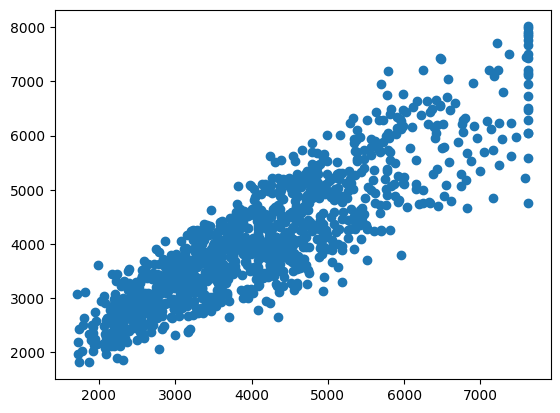

In [313]:
plt.scatter(y1_test, y_pred)
plt.show()

**Make 4 models using ANN, Decision Tree, Random Forest, and Linear Regression**

- Check Train and Test RMSE
- Check Train and Test Scores

In [314]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [315]:
x=df_final.drop(['AgentBonus'],axis=1)
y=df_final.AgentBonus

In [316]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=123,test_size=0.25)

In [317]:
ss=StandardScaler() 
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

annr = MLPRegressor(hidden_layer_sizes=(500),random_state=123, max_iter=10000)#you are free to tweak the layer sizes
rfr = RandomForestRegressor(random_state=123)
dtr = tree.DecisionTreeRegressor(random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  # we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    
    if (i != annr) :
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
 
    else :
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

###  Grid Search on Decision Tree

In [319]:
param_grid = {
    'max_depth': [10,15,20,25,30],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [15,30,35,40,50],
}

dtr=tree.DecisionTreeRegressor(random_state=123)

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)


grid_search.fit(x_train,y_train)

print(grid_search.best_params_)

{'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 50}


### Grid search on Random Forest

In [320]:
param_grid = {
    'max_depth': [7,10],
    'max_features': [4, 6],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [30, 50,100],
    'n_estimators': [300, 500]
}

rfr = RandomForestRegressor(random_state=123)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3)

In [321]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [3, 15, 30],
                         'min_samples_split': [30, 50, 100],
                         'n_estimators': [300, 500]})

In [323]:
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 30, 'n_estimators': 300}


In [324]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [325]:
x=df_final.drop(['AgentBonus'],axis=1)
y=df_final.AgentBonus

In [326]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=123,test_size=0.25)

In [327]:
ss=StandardScaler() 
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

In [328]:
param_grid = {
    'hidden_layer_sizes':[(500),(100,100)], 
    # keeping these simple because it would take too much time to run on low-end computers
    "activation": ["tanh", "relu"], 
    "solver": ["sgd", "adam"]}

annr = MLPRegressor(max_iter=10000, random_state=123)

grid_search = GridSearchCV(estimator = annr, param_grid = param_grid, cv = 3)

In [329]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [330]:
x=df_final.drop(['AgentBonus'],axis=1)
y=df_final.AgentBonus

In [331]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=123,test_size=0.25)

In [332]:
ss=StandardScaler() 
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

In [333]:
param_grid = {
    'hidden_layer_sizes':[(500),(100,100)], 
    # keeping these simple because it would take too much time to run on low-end computers
    "activation": ["tanh", "relu"], 
    "solver": ["sgd", "adam"]}

annr = MLPRegressor(max_iter=10000, random_state=123)

grid_search = GridSearchCV(estimator = annr, param_grid = param_grid, cv = 3)

In [335]:
rfr = RandomForestRegressor(max_depth=10, max_features=6, 
                            min_samples_leaf= 3,
                            min_samples_split= 30, n_estimators= 500,
                            random_state=123)
models=[rfr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape_train=[]
mape_test=[]

for i in models:
    if (i != rfr):
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
        
    else :
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Random Forest Regressor']))

                         Train RMSE   Test RMSE  Training Score  Test Score
Random Forest Regressor   510.76925  557.783257        0.861503    0.819842


In [336]:
annr = MLPRegressor(hidden_layer_sizes=(500),random_state=123, max_iter=10000)
                    
models=[annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  # we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    
    if (i != annr) :
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
 
    else :
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['ANN Regressor']))

               Train RMSE   Test RMSE  Training Score  Test Score
ANN Regressor  504.574259  598.187181        0.864842    0.792796


In [338]:
regression_model = LinearRegression()

models=[regression_model]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  
    
    if (i != regression_model) :
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
 
    else :
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression']))

                   Train RMSE   Test RMSE  Training Score  Test Score
Linear Regression  635.743312  623.781958        0.785437    0.774685


In [340]:
dtr = tree.DecisionTreeRegressor(random_state=123)

models=[dtr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models: 
    
    if (i != dtr) :
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
 
    else :
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Decision Tree Regressor']))

                         Train RMSE   Test RMSE  Training Score  Test Score
Decision Tree Regressor         0.0  762.190428             1.0    0.663604
